In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')



In [3]:
import chardet
with open("spotify-2023.csv", 'rb') as rawdata:
    print(chardet.detect(rawdata.read(10000)))

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [4]:
df = pd.read_csv("spotify-2023.csv",encoding='ISO-8859-1')
df  

track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_playlists  \
0             2023               7            14                   553   
1             2023               3            23                  1474   
2             2023               6            30                  1397   
3             2019               8            23                  7858   
4             2023               5            18                  3133   
..             ...             ...           ...                   ...   
948           2022              11             3                   953   
949           2022              10            21                  1180   
950           2022              11             3                   573   
951           2022              10            20                  1320   
952           2022              11             4                   782   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                  147  141381703                  43  ...  125   B  Major   
1                   48  133716286                  48  ...   92  C#  Major   
2                  113  140003974                  94  ...  138   F  Major   
3                  100  800840817                 116  ...  170   A  Major   
4                   50  303236322                  84  ...  144   A  Minor   
..                 ...        ...                 ...  ...  ...  ..    ...   
948                  0   91473363                  61  ...  144   A  Major   
949                  0  121871870                   4  ...  166  F#  Major   
950                  0   73513683                   2  ...   92  C#  Major   
951                  0  133895612                  29  ...   97  C#  Major   
952                  2   96007391                  27  ...   90   E  Minor   

    danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0               80         89       83             31                   0   
1               71         61       74              7                   0   
2               51         32       53             17                   0   
3               55         58       72             11                   0   
4               65         23       80             14                  63   
..             ...        ...      ...            ...                 ...   
948             60         24       39             57                   0   
949             42          7       24             83                   1   
950             80         81       67              4                   0   
951             82         67       77              8                   0   
952             61         32       67             15                   0   

     liveness_%  speechiness_%  
0             8              4  
1            10              4  
2            31              6  
3            11             15  
4            11              6  
..          ...            ...  
948           8              3  
949          12              6  
950           8              6  
951         

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

<Axes: >

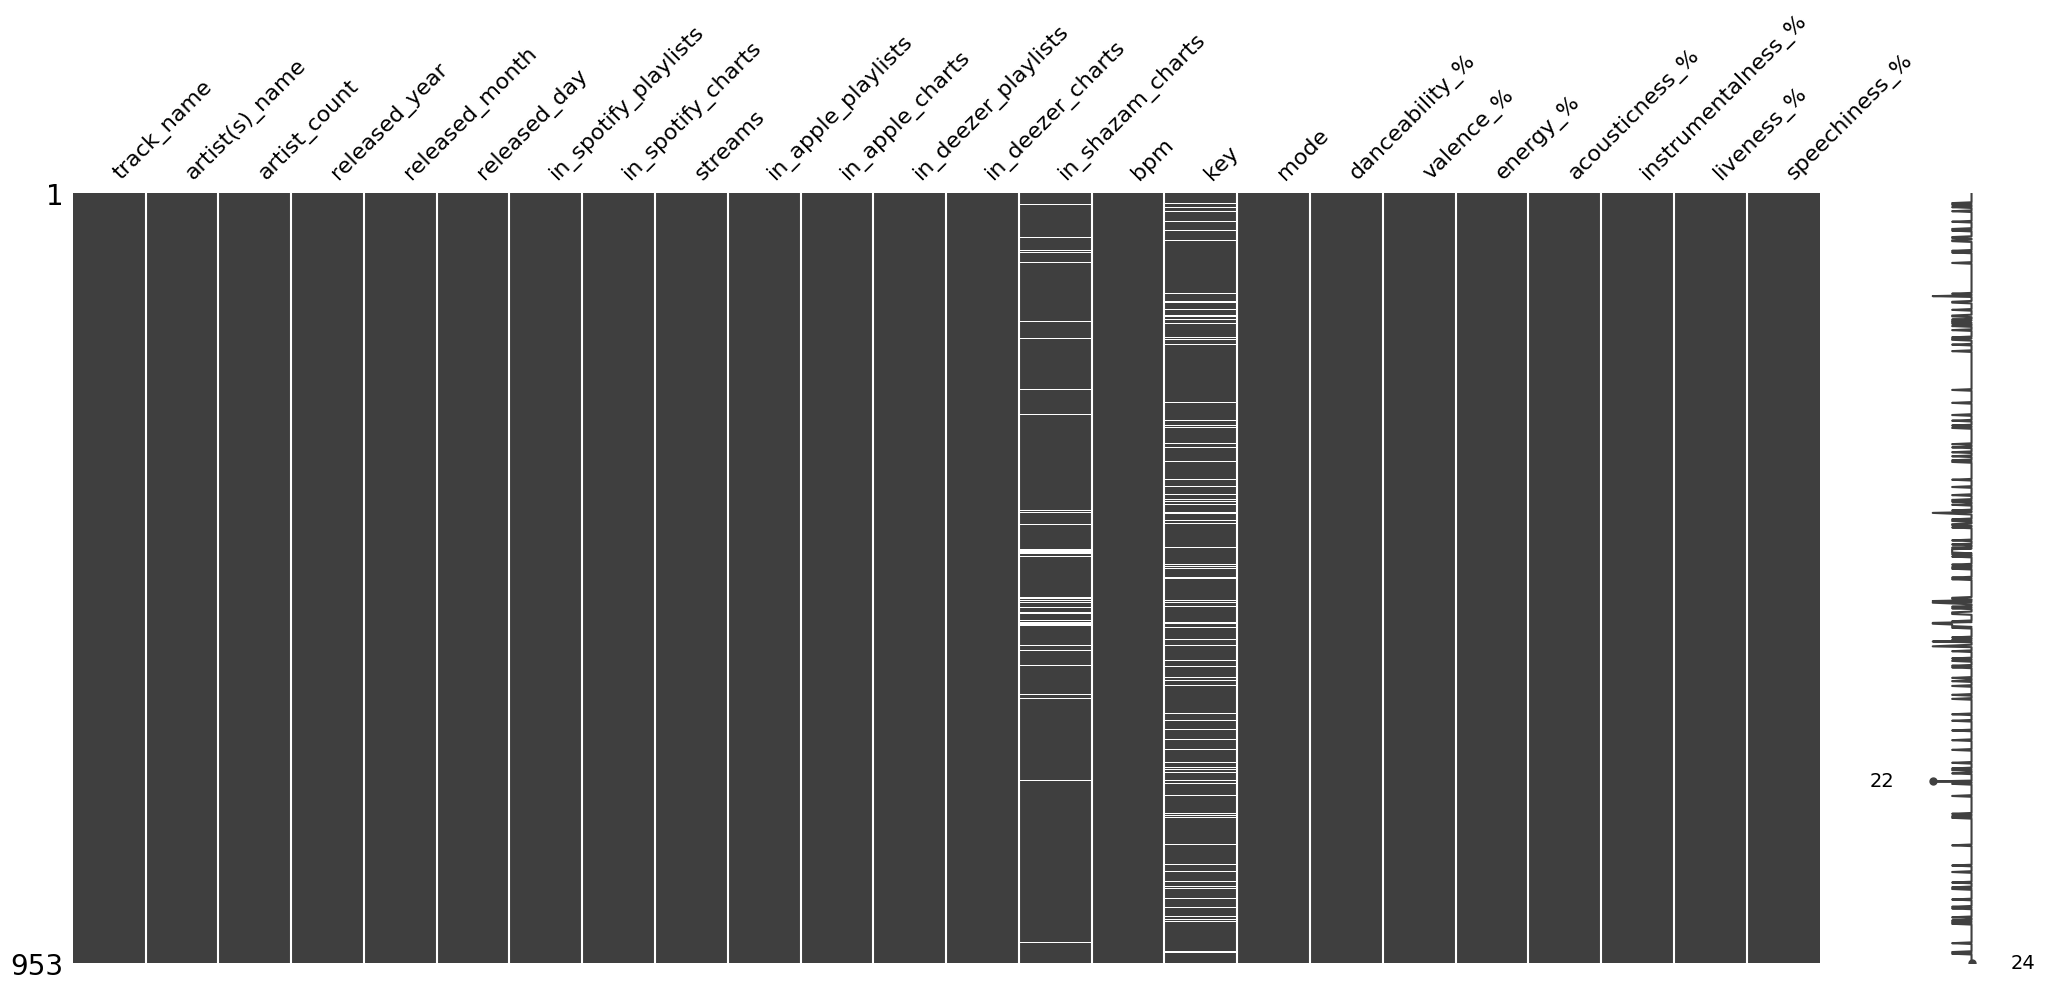

In [6]:
msno.matrix(df)

In [7]:
df.describe()

artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000           0.000000           13.000000   
50%             2224.000000           3.000000           34.000000   
75%             5542.000000          16.000000           88.000000   
max            52898.000000         147.000000          672.000000   

       in_apple_charts  in_deezer_charts         bpm  danceability_%  \
count       953.000000        953.000000  953.000000       953.00000   
mean         51.908709          2.666317  122.540399        66.96957   
std          50.630241          6.035599   28.057802        14.63061   
min           0.000000          0.000000   65.000000        23.00000   
25%           7.000000          0.000000  100.000000        57.00000   
50%          38.000000          0.000000  121.000000        69.00000   
75%          87.000000          2.000000  140.000000        78.00000   
max         275.000000         58.000000  206.000000        96.00000   

        valence_%    energy_%  acousticness_%  instrumentalness_%  liveness_%  \
count  953.000000  953.000000      953.000000          953.000000  953.000000   
mean    51.431270   64.279119       27.057712            1.581322   18.213012   
std     23.480632   16.550526       25.996077            8.409800   13.711223   
min      4.000000    9.000000        0.000000            0.000000    3.000000   
25%     32.000000   53.000000        6.000000            0.000000   10.000000   
50%     51.000000   66.000000       18.000000            0.000000   12.000000   
75%     70.000000   77.000000       43.000000            0.000000   24.000000   
max     97.000000   97.000000       97.000000           91.000000   97.000000   

       speechiness_%  
count     953.000000  
mean       10.131165  
std         9.912888  
min         2.000000  
25%         4.000000  
50%         6.000000  
75%        11.000000  
max        64.000000

In [8]:
# streams의 데이터 타입을 숫자형으로 변환, 에러 시 NaN으로 변환
df["streams"] = pd.to_numeric(df["streams"], errors='coerce')

<Axes: >

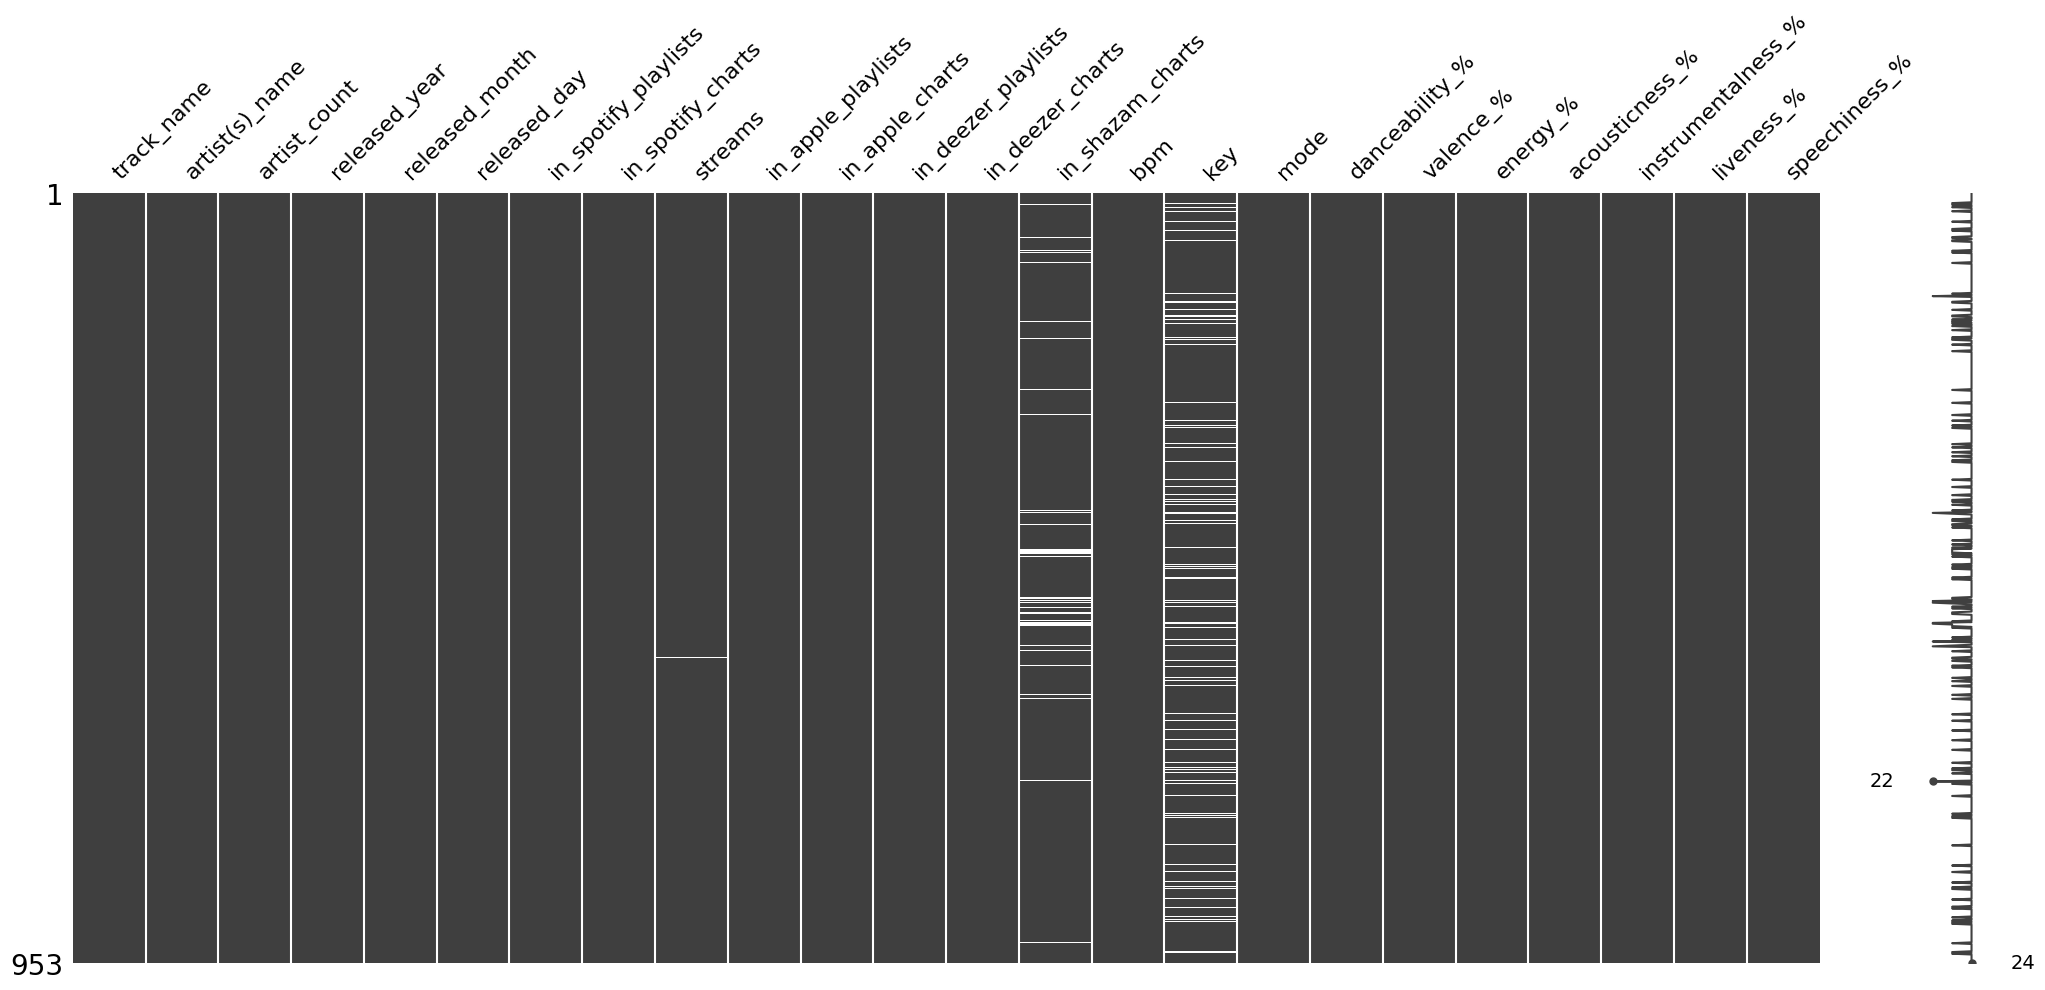

In [9]:
msno.matrix(df)

In [10]:
track_name_to_id = {name:idx for idx, name in enumerate(df["track_name"].unique())}
df["track_id"] = df["track_name"].map(track_name_to_id)
df.drop(columns=["track_name"], inplace=True)
df

artist(s)_name  artist_count  released_year  released_month  \
0      Latto, Jung Kook             2           2023               7   
1           Myke Towers             1           2023               3   
2        Olivia Rodrigo             1           2023               6   
3          Taylor Swift             1           2019               8   
4             Bad Bunny             1           2023               5   
..                  ...           ...            ...             ...   
948        Selena Gomez             1           2022              11   
949        Taylor Swift             1           2022              10   
950  Feid, Paulo Londra             2           2022              11   
951  Feid, Sech, Jhayco             3           2022              10   
952           Burna Boy             1           2022              11   

     released_day  in_spotify_playlists  in_spotify_charts      streams  \
0              14                   553                147  141381703.0   
1              23                  1474                 48  133716286.0   
2              30                  1397                113  140003974.0   
3              23                  7858                100  800840817.0   
4              18                  3133                 50  303236322.0   
..            ...                   ...                ...          ...   
948             3                   953                  0   91473363.0   
949            21                  1180                  0  121871870.0   
950             3                   573                  0   73513683.0   
951            20                  1320                  0  133895612.0   
952             4                   782                  2   96007391.0   

     in_apple_playlists  in_apple_charts  ... key   mode danceability_%  \
0                    43              263  ...   B  Major             80   
1                    48              126  ...  C#  Major             71   
2                    94              207  ...   F  Major             51   
3                   116              207  ...   A  Major             55   
4                    84              133  ...   A  Minor             65   
..                  ...              ...  ...  ..    ...            ...   
948                  61               13  ...   A  Major             60   
949                   4                0  ...  F#  Major             42   
950                   2                0  ...  C#  Major             80   
951                  29               26  ...  C#  Major             82   
952                  27               18  ...   E  Minor             61   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
0           89       83             31                   0           8   
1           61       74              7                   0          10   
2           32       53             17                   0          31   
3           58       72             11                   0          11   
4           23       80             14                  63          11   
..         ...      ...            ...                 ...         ...   
948         24       39             57                   0           8   
949          7       24             83                   1          12   
950         81       67              4                   0           8   
951         67       77              8                   0          12   
952         32       67             15                   0          11   

     speechiness_%  track_id  
0                4         0  
1                4         1  
2                6         2  
3               15         3  
4                6         4  
..             ...       ...  
948              3       938  
949              6       939  
950              6       940  
951              5       941  
952              5       942  

[953 rows x 24 columns]

In [11]:
df = df[['track_id','artist(s)_name', 'artist_count', 'released_year', 'released_month',
       'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%']]

In [12]:
# 음과 관련된 컬럼들
voi_col = ['track_id', 'streams','bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
df_voi = df[voi_col]
df_voi

track_id      streams  bpm key   mode  danceability_%  valence_%  \
0           0  141381703.0  125   B  Major              80         89   
1           1  133716286.0   92  C#  Major              71         61   
2           2  140003974.0  138   F  Major              51         32   
3           3  800840817.0  170   A  Major              55         58   
4           4  303236322.0  144   A  Minor              65         23   
..        ...          ...  ...  ..    ...             ...        ...   
948       938   91473363.0  144   A  Major              60         24   
949       939  121871870.0  166  F#  Major              42          7   
950       940   73513683.0   92  C#  Major              80         81   
951       941  133895612.0   97  C#  Major              82         67   
952       942   96007391.0   90   E  Minor              61         32   

     energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%  
0          83              31                   0           8              4  
1          74               7                   0          10              4  
2          53              17                   0          31              6  
3          72              11                   0          11             15  
4          80              14                  63          11              6  
..        ...             ...                 ...         ...            ...  
948        39              57                   0           8              3  
949        24              83                   1          12              6  
950        67               4                   0           8              6  
951        77               8                   0          12              5  
952        67              15                   0          11              5  

[953 rows x 12 columns]

In [13]:
# one-hot encoding
df_features = df_voi.copy()
df_features = pd.get_dummies(df_features, columns=['key', 'mode'],prefix=['key', 'mode'])
df_features

track_id      streams  bpm  danceability_%  valence_%  energy_%  \
0           0  141381703.0  125              80         89        83   
1           1  133716286.0   92              71         61        74   
2           2  140003974.0  138              51         32        53   
3           3  800840817.0  170              55         58        72   
4           4  303236322.0  144              65         23        80   
..        ...          ...  ...             ...        ...       ...   
948       938   91473363.0  144              60         24        39   
949       939  121871870.0  166              42          7        24   
950       940   73513683.0   92              80         81        67   
951       941  133895612.0   97              82         67        77   
952       942   96007391.0   90              61         32        67   

     acousticness_%  instrumentalness_%  liveness_%  speechiness_%  ...  \
0                31                   0           8              4  ...   
1                 7                   0          10              4  ...   
2                17                   0          31              6  ...   
3                11                   0          11             15  ...   
4                14                  63          11              6  ...   
..              ...                 ...         ...            ...  ...   
948              57                   0           8              3  ...   
949              83                   1          12              6  ...   
950               4                   0           8              6  ...   
951               8                   0          12              5  ...   
952              15                   0          11              5  ...   

     key_C#  key_D  key_D#  key_E  key_F  key_F#  key_G  key_G#  mode_Major  \
0     False  False   False  False  False   False  False   False        True   
1      True  False   False  False  False   False  False   False        True   
2     False  False   False  False   True   False  False   False        True   
3     False  False   False  False  False   False  False   False        True   
4     False  False   False  False  False   False  False   False       False   
..      ...    ...     ...    ...    ...     ...    ...     ...         ...   
948   False  False   False  False  False   False  False   False        True   
949   False  False   False  False  False    True  False   False        True   
950    True  False   False  False  False   False  False   False        True   
951    True  False   False  False  False   False  False   False        True   
952   False  False   False   True  False   False  False   False       False   

     mode_Minor  
0         False  
1         False  
2         False  
3         False  
4          True  
..          ...  
948       False  
949       False  
950       False  
951       False  
952        True  

[953 rows x 23 columns]

In [14]:
# rename columns
re_col = {
    'danceability_%': 'danceability',
    'valence_%': 'valence',
    'energy_%': 'energy',
    'acousticness_%': 'acousticness',
    'instrumentalness_%': 'instrumentalness',
    'liveness_%': 'liveness',
    'speechiness_%': 'speechiness' 
}

df_features.rename(columns=re_col, inplace=True)
df_features

track_id      streams  bpm  danceability  valence  energy  acousticness  \
0           0  141381703.0  125            80       89      83            31   
1           1  133716286.0   92            71       61      74             7   
2           2  140003974.0  138            51       32      53            17   
3           3  800840817.0  170            55       58      72            11   
4           4  303236322.0  144            65       23      80            14   
..        ...          ...  ...           ...      ...     ...           ...   
948       938   91473363.0  144            60       24      39            57   
949       939  121871870.0  166            42        7      24            83   
950       940   73513683.0   92            80       81      67             4   
951       941  133895612.0   97            82       67      77             8   
952       942   96007391.0   90            61       32      67            15   

     instrumentalness  liveness  speechiness  ...  key_C#  key_D  key_D#  \
0                   0         8            4  ...   False  False   False   
1                   0        10            4  ...    True  False   False   
2                   0        31            6  ...   False  False   False   
3                   0        11           15  ...   False  False   False   
4                  63        11            6  ...   False  False   False   
..                ...       ...          ...  ...     ...    ...     ...   
948                 0         8            3  ...   False  False   False   
949                 1        12            6  ...   False  False   False   
950                 0         8            6  ...    True  False   False   
951                 0        12            5  ...    True  False   False   
952                 0        11            5  ...   False  False   False   

     key_E  key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  
0    False  False   False  False   False        True       False  
1    False  False   False  False   False        True       False  
2    False   True   False  False   False        True       False  
3    False  False   False  False   False        True       False  
4    False  False   False  False   False       False        True  
..     ...    ...     ...    ...     ...         ...         ...  
948  False  False   False  False   False        True       False  
949  False  False    True  False   False        True       False  
950  False  False   False  False   False        True       False  
951  False  False   False  False   False        True       False  
952   True  False   False  False   False       False        True  

[953 rows x 23 columns]

## Analyze & Visualization: Data Analysis

In [15]:
df_da = df_features.drop(columns=['track_id']).copy()
df_da

streams  bpm  danceability  valence  energy  acousticness  \
0    141381703.0  125            80       89      83            31   
1    133716286.0   92            71       61      74             7   
2    140003974.0  138            51       32      53            17   
3    800840817.0  170            55       58      72            11   
4    303236322.0  144            65       23      80            14   
..           ...  ...           ...      ...     ...           ...   
948   91473363.0  144            60       24      39            57   
949  121871870.0  166            42        7      24            83   
950   73513683.0   92            80       81      67             4   
951  133895612.0   97            82       67      77             8   
952   96007391.0   90            61       32      67            15   

     instrumentalness  liveness  speechiness  key_A  ...  key_C#  key_D  \
0                   0         8            4  False  ...   False  False   
1                   0        10            4  False  ...    True  False   
2                   0        31            6  False  ...   False  False   
3                   0        11           15   True  ...   False  False   
4                  63        11            6   True  ...   False  False   
..                ...       ...          ...    ...  ...     ...    ...   
948                 0         8            3   True  ...   False  False   
949                 1        12            6  False  ...   False  False   
950                 0         8            6  False  ...    True  False   
951                 0        12            5  False  ...    True  False   
952                 0        11            5  False  ...   False  False   

     key_D#  key_E  key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  
0     False  False  False   False  False   False        True       False  
1     False  False  False   False  False   False        True       False  
2     False  False   True   False  False   False        True       False  
3     False  False  False   False  False   False        True       False  
4     False  False  False   False  False   False       False        True  
..      ...    ...    ...     ...    ...     ...         ...         ...  
948   False  False  False   False  False   False        True       False  
949   False  False  False    True  False   False        True       False  
950   False  False  False   False  False   False        True       False  
951   False  False  False   False  False   False        True       False  
952   False   True  False   False  False   False       False        True  

[953 rows x 22 columns]

In [16]:
df_da.describe()

streams         bpm  danceability     valence      energy  \
count  9.520000e+02  953.000000     953.00000  953.000000  953.000000   
mean   5.141374e+08  122.540399      66.96957   51.431270   64.279119   
std    5.668569e+08   28.057802      14.63061   23.480632   16.550526   
min    2.762000e+03   65.000000      23.00000    4.000000    9.000000   
25%    1.416362e+08  100.000000      57.00000   32.000000   53.000000   
50%    2.905309e+08  121.000000      69.00000   51.000000   66.000000   
75%    6.738690e+08  140.000000      78.00000   70.000000   77.000000   
max    3.703895e+09  206.000000      96.00000   97.000000   97.000000   

       acousticness  instrumentalness    liveness  speechiness  
count    953.000000        953.000000  953.000000   953.000000  
mean      27.057712          1.581322   18.213012    10.131165  
std       25.996077          8.409800   13.711223     9.912888  
min        0.000000          0.000000    3.000000     2.000000  
25%        6.000000          0.000000   10.000000     4.000000  
50%       18.000000          0.000000   12.000000     6.000000  
75%       43.000000          0.000000   24.000000    11.000000  
max       97.000000         91.000000   97.000000    64.000000

In [17]:
df_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   streams           952 non-null    float64
 1   bpm               953 non-null    int64  
 2   danceability      953 non-null    int64  
 3   valence           953 non-null    int64  
 4   energy            953 non-null    int64  
 5   acousticness      953 non-null    int64  
 6   instrumentalness  953 non-null    int64  
 7   liveness          953 non-null    int64  
 8   speechiness       953 non-null    int64  
 9   key_A             953 non-null    bool   
 10  key_A#            953 non-null    bool   
 11  key_B             953 non-null    bool   
 12  key_C#            953 non-null    bool   
 13  key_D             953 non-null    bool   
 14  key_D#            953 non-null    bool   
 15  key_E             953 non-null    bool   
 16  key_F             953 non-null    bool   
 1

In [18]:
# bool 타입을 int 타입으로 변환 (True -> 1, False -> 0)

binary_columns = df_da.select_dtypes("bool").columns
df_da[binary_columns] = df_da[binary_columns].astype("int") 
df_da

streams  bpm  danceability  valence  energy  acousticness  \
0    141381703.0  125            80       89      83            31   
1    133716286.0   92            71       61      74             7   
2    140003974.0  138            51       32      53            17   
3    800840817.0  170            55       58      72            11   
4    303236322.0  144            65       23      80            14   
..           ...  ...           ...      ...     ...           ...   
948   91473363.0  144            60       24      39            57   
949  121871870.0  166            42        7      24            83   
950   73513683.0   92            80       81      67             4   
951  133895612.0   97            82       67      77             8   
952   96007391.0   90            61       32      67            15   

     instrumentalness  liveness  speechiness  key_A  ...  key_C#  key_D  \
0                   0         8            4      0  ...       0      0   
1                   0        10            4      0  ...       1      0   
2                   0        31            6      0  ...       0      0   
3                   0        11           15      1  ...       0      0   
4                  63        11            6      1  ...       0      0   
..                ...       ...          ...    ...  ...     ...    ...   
948                 0         8            3      1  ...       0      0   
949                 1        12            6      0  ...       0      0   
950                 0         8            6      0  ...       1      0   
951                 0        12            5      0  ...       1      0   
952                 0        11            5      0  ...       0      0   

     key_D#  key_E  key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  
0         0      0      0       0      0       0           1           0  
1         0      0      0       0      0       0           1           0  
2         0      0      1       0      0       0           1           0  
3         0      0      0       0      0       0           1           0  
4         0      0      0       0      0       0           0           1  
..      ...    ...    ...     ...    ...     ...         ...         ...  
948       0      0      0       0      0       0           1           0  
949       0      0      0       1      0       0           1           0  
950       0      0      0       0      0       0           1           0  
951       0      0      0       0      0       0           1           0  
952       0      1      0       0      0       0           0           1  

[953 rows x 22 columns]

In [19]:
# int 타입을 float 타입으로 변환
df_da = df_da.astype("float")
df_da

streams    bpm  danceability  valence  energy  acousticness  \
0    141381703.0  125.0          80.0     89.0    83.0          31.0   
1    133716286.0   92.0          71.0     61.0    74.0           7.0   
2    140003974.0  138.0          51.0     32.0    53.0          17.0   
3    800840817.0  170.0          55.0     58.0    72.0          11.0   
4    303236322.0  144.0          65.0     23.0    80.0          14.0   
..           ...    ...           ...      ...     ...           ...   
948   91473363.0  144.0          60.0     24.0    39.0          57.0   
949  121871870.0  166.0          42.0      7.0    24.0          83.0   
950   73513683.0   92.0          80.0     81.0    67.0           4.0   
951  133895612.0   97.0          82.0     67.0    77.0           8.0   
952   96007391.0   90.0          61.0     32.0    67.0          15.0   

     instrumentalness  liveness  speechiness  key_A  ...  key_C#  key_D  \
0                 0.0       8.0          4.0    0.0  ...     0.0    0.0   
1                 0.0      10.0          4.0    0.0  ...     1.0    0.0   
2                 0.0      31.0          6.0    0.0  ...     0.0    0.0   
3                 0.0      11.0         15.0    1.0  ...     0.0    0.0   
4                63.0      11.0          6.0    1.0  ...     0.0    0.0   
..                ...       ...          ...    ...  ...     ...    ...   
948               0.0       8.0          3.0    1.0  ...     0.0    0.0   
949               1.0      12.0          6.0    0.0  ...     0.0    0.0   
950               0.0       8.0          6.0    0.0  ...     1.0    0.0   
951               0.0      12.0          5.0    0.0  ...     1.0    0.0   
952               0.0      11.0          5.0    0.0  ...     0.0    0.0   

     key_D#  key_E  key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  
0       0.0    0.0    0.0     0.0    0.0     0.0         1.0         0.0  
1       0.0    0.0    0.0     0.0    0.0     0.0         1.0         0.0  
2       0.0    0.0    1.0     0.0    0.0     0.0         1.0         0.0  
3       0.0    0.0    0.0     0.0    0.0     0.0         1.0         0.0  
4       0.0    0.0    0.0     0.0    0.0     0.0         0.0         1.0  
..      ...    ...    ...     ...    ...     ...         ...         ...  
948     0.0    0.0    0.0     0.0    0.0     0.0         1.0         0.0  
949     0.0    0.0    0.0     1.0    0.0     0.0         1.0         0.0  
950     0.0    0.0    0.0     0.0    0.0     0.0         1.0         0.0  
951     0.0    0.0    0.0     0.0    0.0     0.0         1.0         0.0  
952     0.0    1.0    0.0     0.0    0.0     0.0         0.0         1.0  

[953 rows x 22 columns]

In [20]:
# streams의 데이터를 0~1 사이의 값으로 변환
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_da["streams"] = scaler.fit_transform(df_da[["streams"]])
df_da

streams    bpm  danceability  valence  energy  acousticness  \
0    0.038170  125.0          80.0     89.0    83.0          31.0   
1    0.036101   92.0          71.0     61.0    74.0           7.0   
2    0.037798  138.0          51.0     32.0    53.0          17.0   
3    0.216215  170.0          55.0     58.0    72.0          11.0   
4    0.081869  144.0          65.0     23.0    80.0          14.0   
..        ...    ...           ...      ...     ...           ...   
948  0.024696  144.0          60.0     24.0    39.0          57.0   
949  0.032903  166.0          42.0      7.0    24.0          83.0   
950  0.019847   92.0          80.0     81.0    67.0           4.0   
951  0.036149   97.0          82.0     67.0    77.0           8.0   
952  0.025920   90.0          61.0     32.0    67.0          15.0   

     instrumentalness  liveness  speechiness  key_A  ...  key_C#  key_D  \
0                 0.0       8.0          4.0    0.0  ...     0.0    0.0   
1                 0.0      10.0          4.0    0.0  ...     1.0    0.0   
2                 0.0      31.0          6.0    0.0  ...     0.0    0.0   
3                 0.0      11.0         15.0    1.0  ...     0.0    0.0   
4                63.0      11.0          6.0    1.0  ...     0.0    0.0   
..                ...       ...          ...    ...  ...     ...    ...   
948               0.0       8.0          3.0    1.0  ...     0.0    0.0   
949               1.0      12.0          6.0    0.0  ...     0.0    0.0   
950               0.0       8.0          6.0    0.0  ...     1.0    0.0   
951               0.0      12.0          5.0    0.0  ...     1.0    0.0   
952               0.0      11.0          5.0    0.0  ...     0.0    0.0   

     key_D#  key_E  key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  
0       0.0    0.0    0.0     0.0    0.0     0.0         1.0         0.0  
1       0.0    0.0    0.0     0.0    0.0     0.0         1.0         0.0  
2       0.0    0.0    1.0     0.0    0.0     0.0         1.0         0.0  
3       0.0    0.0    0.0     0.0    0.0     0.0         1.0         0.0  
4       0.0    0.0    0.0     0.0    0.0     0.0         0.0         1.0  
..      ...    ...    ...     ...    ...     ...         ...         ...  
948     0.0    0.0    0.0     0.0    0.0     0.0         1.0         0.0  
949     0.0    0.0    0.0     1.0    0.0     0.0         1.0         0.0  
950     0.0    0.0    0.0     0.0    0.0     0.0         1.0         0.0  
951     0.0    0.0    0.0     0.0    0.0     0.0         1.0         0.0  
952     0.0    1.0    0.0     0.0    0.0     0.0         0.0         1.0  

[953 rows x 22 columns]

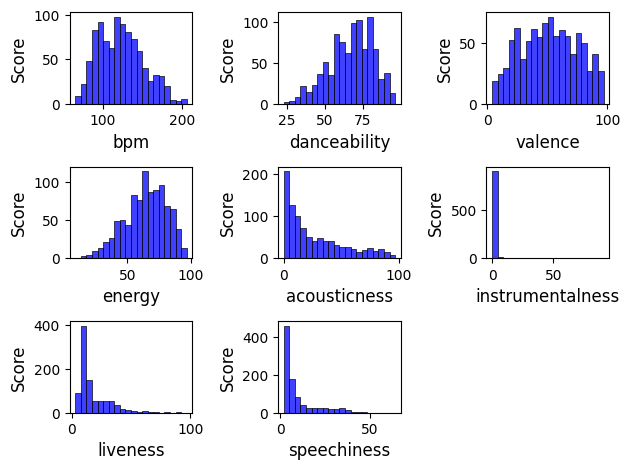

In [21]:
# 데이터 분포 확인
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

for i,column in enumerate(columns_to_plot, 1):
    plt.subplot(3,3,i)
    sns.histplot(data=df_da, x=column,bins=20, color="blue")
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Score", fontsize=12)

plt.tight_layout()
plt.show()


In [22]:
# 데이터 상관관계 확인
colums_to_correlate = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'streams']
correlate_matrix = df_da[colums_to_correlate].corr()
correlate_matrix

bpm  danceability   valence    energy  acousticness  \
bpm               1.000000     -0.147095  0.041195  0.025794     -0.017694   
danceability     -0.147095      1.000000  0.408451  0.198095     -0.236165   
valence           0.041195      0.408451  1.000000  0.357612     -0.081907   
energy            0.025794      0.198095  0.357612  1.000000     -0.577344   
acousticness     -0.017694     -0.236165 -0.081907 -0.577344      1.000000   
instrumentalness -0.001195     -0.089138 -0.132890 -0.038547      0.042796   
liveness         -0.000761     -0.077538  0.021278  0.117302     -0.050142   
speechiness       0.039260      0.184977  0.041081 -0.004846     -0.022501   
streams          -0.002438     -0.105457 -0.040831 -0.026051     -0.004485   

                  instrumentalness  liveness  speechiness   streams  
bpm                      -0.001195 -0.000761     0.039260 -0.002438  
danceability             -0.089138 -0.077538     0.184977 -0.105457  
valence                  -0.132890  0.021278     0.041081 -0.040831  
energy                   -0.038547  0.117302    -0.004846 -0.026051  
acousticness              0.042796 -0.050142    -0.022501 -0.004485  
instrumentalness          1.000000 -0.045967    -0.083396 -0.044902  
liveness                 -0.045967  1.000000    -0.022525 -0.048337  
speechiness              -0.083396 -0.022525     1.000000 -0.112333  
streams                  -0.044902 -0.048337    -0.112333  1.000000

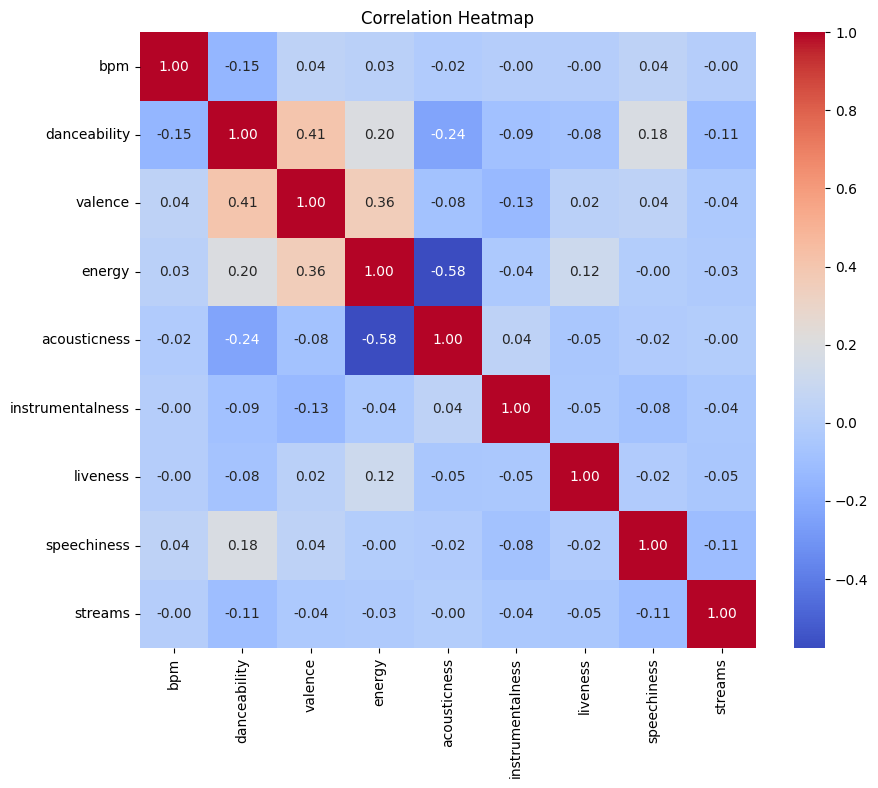

In [23]:
# 상관관계 시각화
plt.figure(figsize=(10,8))
sns.heatmap(correlate_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)

plt.title("Correlation Heatmap")
plt.show()

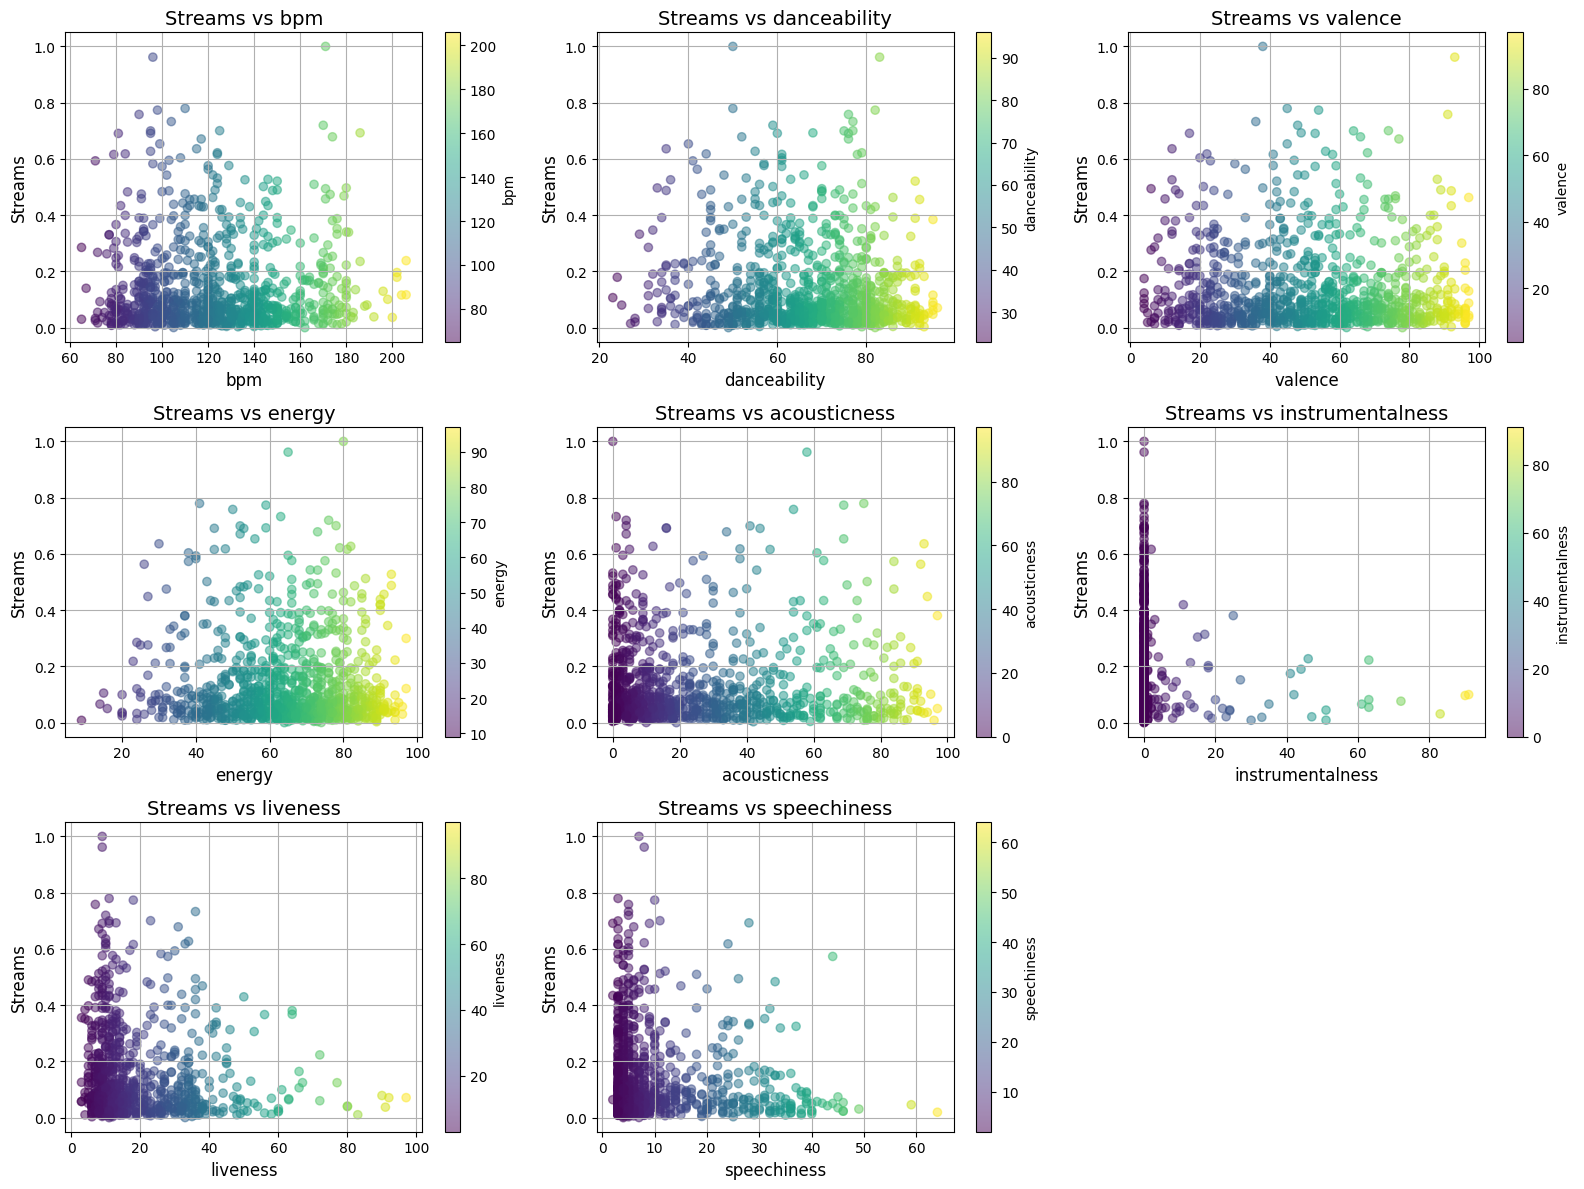

In [24]:
# 각 컬럼과 Streams의 상관관계 시각화
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']
fig,axs = plt.subplots(3,3, figsize=(16,12))
axs = axs.flatten() # 2차원 배열을 1차원 배열로 변환
color_map = plt.cm.get_cmap("viridis")
for i,column in enumerate(columns_to_plot):
    plt.sca(axs[i]) # 현재 subplot 설정 (이후에 그리는 그래프는 axs[i]에 그려짐)
    scatter = plt.scatter(df_da[column], df_da["streams"], c=df_da[column], cmap=color_map, alpha=0.5)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Streams", fontsize=12)
    plt.title(f"Streams vs {column}", fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label=column) # colorbar 표시

for i in range(len(columns_to_plot), len(axs)):
    axs[i].axis("off") # 빈 subplot은 제거

plt.tight_layout() # subplot간의 간격을 자동으로 맞춰줌
plt.show()

In [25]:
# df_da에 key 컬럼 추가
df_da = df_da.merge(df[["key"]], left_index=True,right_index=True, how="inner")
df_da


streams    bpm  danceability  valence  energy  acousticness  \
0    0.038170  125.0          80.0     89.0    83.0          31.0   
1    0.036101   92.0          71.0     61.0    74.0           7.0   
2    0.037798  138.0          51.0     32.0    53.0          17.0   
3    0.216215  170.0          55.0     58.0    72.0          11.0   
4    0.081869  144.0          65.0     23.0    80.0          14.0   
..        ...    ...           ...      ...     ...           ...   
948  0.024696  144.0          60.0     24.0    39.0          57.0   
949  0.032903  166.0          42.0      7.0    24.0          83.0   
950  0.019847   92.0          80.0     81.0    67.0           4.0   
951  0.036149   97.0          82.0     67.0    77.0           8.0   
952  0.025920   90.0          61.0     32.0    67.0          15.0   

     instrumentalness  liveness  speechiness  key_A  ...  key_D  key_D#  \
0                 0.0       8.0          4.0    0.0  ...    0.0     0.0   
1                 0.0      10.0          4.0    0.0  ...    0.0     0.0   
2                 0.0      31.0          6.0    0.0  ...    0.0     0.0   
3                 0.0      11.0         15.0    1.0  ...    0.0     0.0   
4                63.0      11.0          6.0    1.0  ...    0.0     0.0   
..                ...       ...          ...    ...  ...    ...     ...   
948               0.0       8.0          3.0    1.0  ...    0.0     0.0   
949               1.0      12.0          6.0    0.0  ...    0.0     0.0   
950               0.0       8.0          6.0    0.0  ...    0.0     0.0   
951               0.0      12.0          5.0    0.0  ...    0.0     0.0   
952               0.0      11.0          5.0    0.0  ...    0.0     0.0   

     key_E  key_F  key_F#  key_G  key_G#  mode_Major  mode_Minor  key  
0      0.0    0.0     0.0    0.0     0.0         1.0         0.0    B  
1      0.0    0.0     0.0    0.0     0.0         1.0         0.0   C#  
2      0.0    1.0     0.0    0.0     0.0         1.0         0.0    F  
3      0.0    0.0     0.0    0.0     0.0         1.0         0.0    A  
4      0.0    0.0     0.0    0.0     0.0         0.0         1.0    A  
..     ...    ...     ...    ...     ...         ...         ...  ...  
948    0.0    0.0     0.0    0.0     0.0         1.0         0.0    A  
949    0.0    0.0     1.0    0.0     0.0         1.0         0.0   F#  
950    0.0    0.0     0.0    0.0     0.0         1.0         0.0   C#  
951    0.0    0.0     0.0    0.0     0.0         1.0         0.0   C#  
952    1.0    0.0     0.0    0.0     0.0         0.0         1.0    E  

[953 rows x 23 columns]

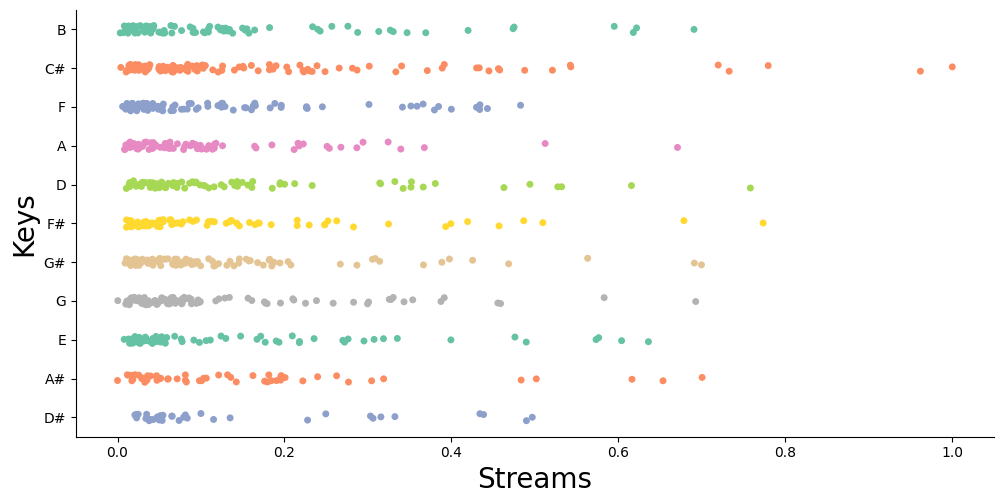

In [26]:
# 각 key별 streams 분포 시각화
pallete = sns.color_palette("Set2", len(df_da["key"].unique()))
sns.catplot(y="key",x="streams",data=df_da.dropna(subset=["key"]),palette=pallete,aspect=2)
plt.xlabel("Streams", fontsize=20)
plt.ylabel("Keys", fontsize=20)
plt.show()

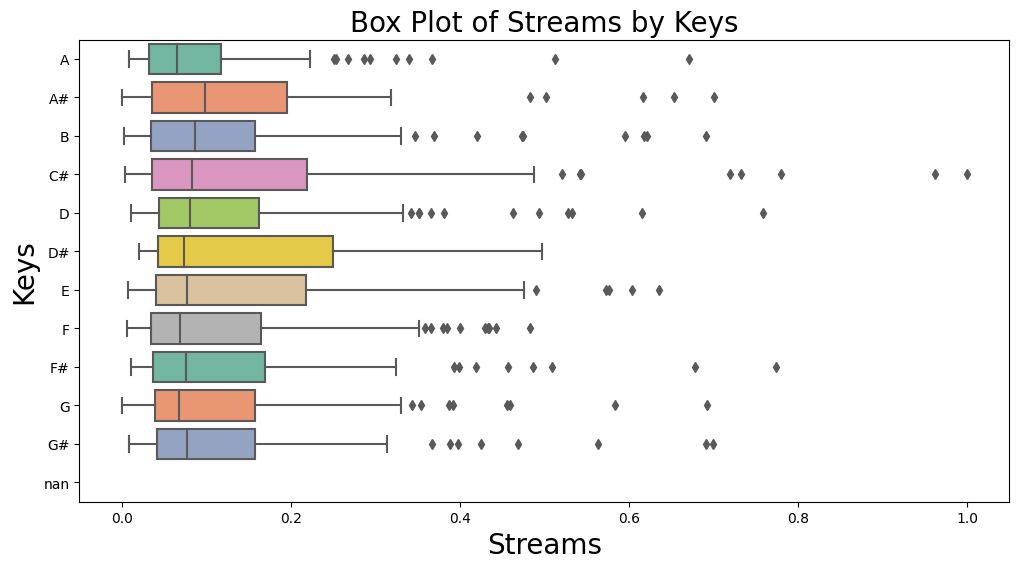

In [38]:
# Streams와 Key의 Box plot 
sorted_keys = df_da["key"].sort_values().unique()
plt.figure(figsize=(12,6))
sns.boxplot(y="key",x="streams",data=df_da.dropna(subset=["key"]),palette=pallete, order=sorted_keys)
plt.xlabel("Streams", fontsize=20)
plt.ylabel("Keys", fontsize=20)
plt.title("Box Plot of Streams by Keys", fontsize=20)
plt.show()

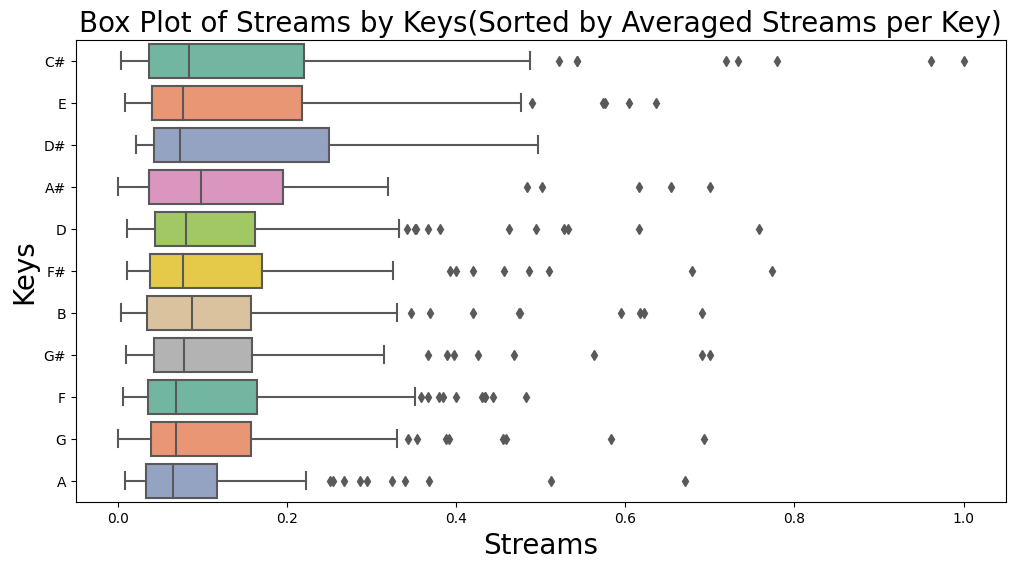

In [39]:
# 각 key별 streams 분포 시각화 (평균값 기준으로 정렬)
sorted_keys = df_da.groupby("key")["streams"].mean().sort_values(ascending=False).index
plt.figure(figsize=(12,6))
sns.boxplot(y="key",x="streams",data=df_da.dropna(subset=["key"]),palette=pallete, order=sorted_keys)
plt.xlabel("Streams", fontsize=20)
plt.ylabel("Keys", fontsize=20)
plt.title("Box Plot of Streams by Keys(Sorted by Averaged Streams per Key)", fontsize=20)
plt.show()

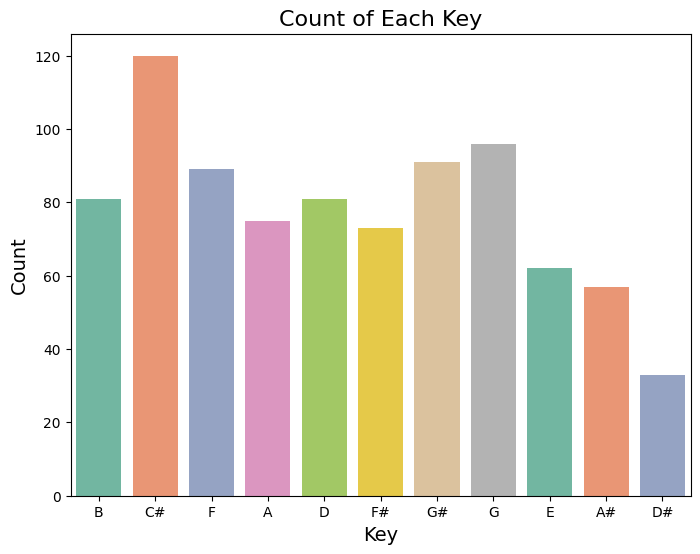

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(x="key",data=df_da,palette="Set2")
plt.xlabel("Key", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Count of Each Key", fontsize=16)
plt.show()

In [55]:
# key별로 count 수 확인
key_counts = df_da["key"].value_counts().reset_index()
total_count_key = key_counts["count"].sum() 
total_row = pd.DataFrame({'key':['total'], 'count':[total_count_key]})
key_counts = pd.concat([key_counts, total_row], axis=0)



total_counts = df_da["key"].count()

is_equal = total_counts == key_counts.loc[key_counts["key"] == "total"]["count"].values[0]
print("Is total_count equal to 'Total'Key? ", is_equal)

print("Total count of values in the 'key' column:", total_counts)
print(key_counts)

Is total_count equal to 'Total'Key?  True
Total count of values in the 'key' column: 858
      key  count
0      C#    120
1       G     96
2      G#     91
3       F     89
4       B     81
5       D     81
6       A     75
7      F#     73
8       E     62
9      A#     57
10     D#     33
0   total    858


In [60]:
key_counts = key_counts.loc[key_counts["key"] != "total"]
key_counts.value_counts()

key  count
A    75       1
A#   57       1
B    81       1
C#   120      1
D    81       1
D#   33       1
E    62       1
F    89       1
F#   73       1
G    96       1
G#   91       1
Name: count, dtype: int64

In [62]:
df_da.columns = df_da.columns.str.lower()
key_counts.columns = key_counts.columns.str.lower()

In [68]:
merged_df = key_counts.merge(df_da,on="key")
result_df = merged_df.groupby("key")["streams"].agg(["mean","min","max"]).reset_index()
result_df = result_df.rename(columns={"mean":"avg_streams","min":"min_streams","max":"max_streams"})
result_df

key  avg_streams  min_streams  max_streams
0    A     0.110381     0.008605     0.670865
1   A#     0.149160     0.000000     0.700354
2    B     0.140216     0.003227     0.690618
3   C#     0.163147     0.003990     1.000000
4    D     0.142964     0.010591     0.758147
5   D#     0.149312     0.020743     0.496872
6    E     0.155916     0.007981     0.636011
7    F     0.126473     0.006096     0.482823
8   F#     0.141030     0.010709     0.773454
9    G     0.122195     0.000368     0.692657
10  G#     0.128759     0.009012     0.699594

In [69]:
sorted_df = df_da.sort_values(by="streams")
lowest_10 = sorted_df.head(10)
lowest_10

streams    bpm  danceability  valence  energy  acousticness  \
123  0.000000  162.0          49.0     78.0    64.0          19.0   
393  0.000368  105.0          82.0     62.0    74.0          10.0   
144  0.003131   97.0          79.0     92.0    89.0           5.0   
142  0.003227  133.0          93.0     68.0    65.0          42.0   
68   0.003990  140.0          56.0     48.0    73.0           0.0   
58   0.004322  128.0          86.0     42.0    72.0          59.0   
30   0.006096  126.0          74.0     35.0    84.0           0.0   
248  0.006742  143.0          83.0     25.0    69.0           4.0   
104  0.007981  134.0          81.0     53.0    72.0          51.0   
193  0.008192  146.0          50.0     67.0    89.0           0.0   

     instrumentalness  liveness  speechiness  key_a  ...  key_d  key_d#  \
123               0.0      11.0          4.0    0.0  ...    0.0     0.0   
393               0.0      33.0          7.0    0.0  ...    0.0     0.0   
144               0.0       6.0          5.0    0.0  ...    0.0     0.0   
142               0.0      12.0         25.0    0.0  ...    0.0     0.0   
68                0.0      35.0          4.0    0.0  ...    0.0     0.0   
58                0.0       9.0         19.0    0.0  ...    0.0     0.0   
30                0.0      11.0          6.0    0.0  ...    0.0     0.0   
248               0.0      23.0         12.0    0.0  ...    0.0     0.0   
104               0.0      12.0          5.0    0.0  ...    0.0     0.0   
193               0.0      19.0          8.0    0.0  ...    0.0     0.0   

     key_e  key_f  key_f#  key_g  key_g#  mode_major  mode_minor  key  
123    0.0    0.0     0.0    0.0     0.0         1.0         0.0   A#  
393    0.0    0.0     0.0    1.0     0.0         1.0         0.0    G  
144    0.0    0.0     0.0    0.0     0.0         1.0         0.0  NaN  
142    0.0    0.0     0.0    0.0     0.0         0.0         1.0    B  
68     0.0    0.0     0.0    0.0     0.0         1.0         0.0   C#  
58     0.0    0.0     0.0    0.0     0.0         0.0         1.0  NaN  
30     0.0    1.0     0.0    0.0     0.0         0.0         1.0    F  
248    0.0    0.0     0.0    0.0     0.0         1.0         0.0    B  
104    1.0    0.0     0.0    0.0     0.0         0.0         1.0    E  
193    0.0    0.0     0.0    0.0     0.0         0.0         1.0    B  

[10 rows x 23 columns]

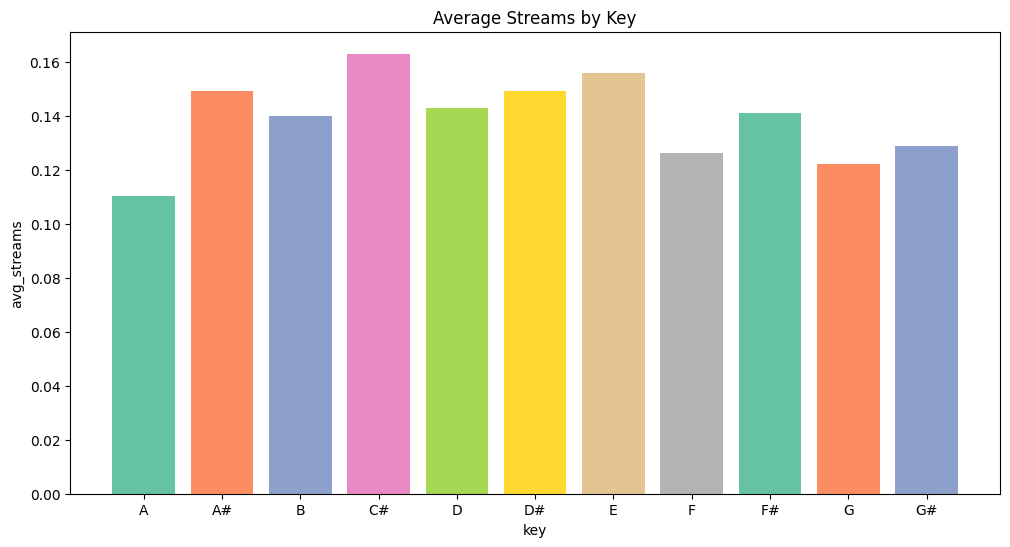

In [71]:
plt.figure(figsize=(12,6))
pallete = sns.color_palette("Set2",len(result_df["key"]))
plt.bar(result_df["key"],result_df["avg_streams"],color=pallete)
plt.xlabel("key")
plt.ylabel("avg_streams")
plt.title("Average Streams by Key")
plt.show()

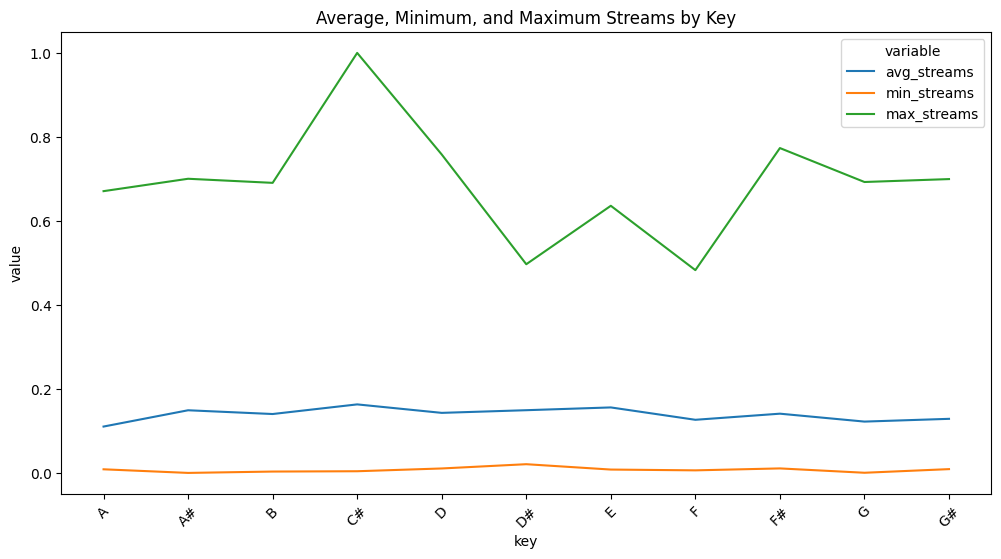

In [79]:
plt.figure(figsize=(12,6))
sns.lineplot(x="key",y="value",hue="variable",data=pd.melt(result_df,id_vars=["key"]))
plt.title('Average, Minimum, and Maximum Streams by Key')
plt.xticks(rotation=45)
plt.show()

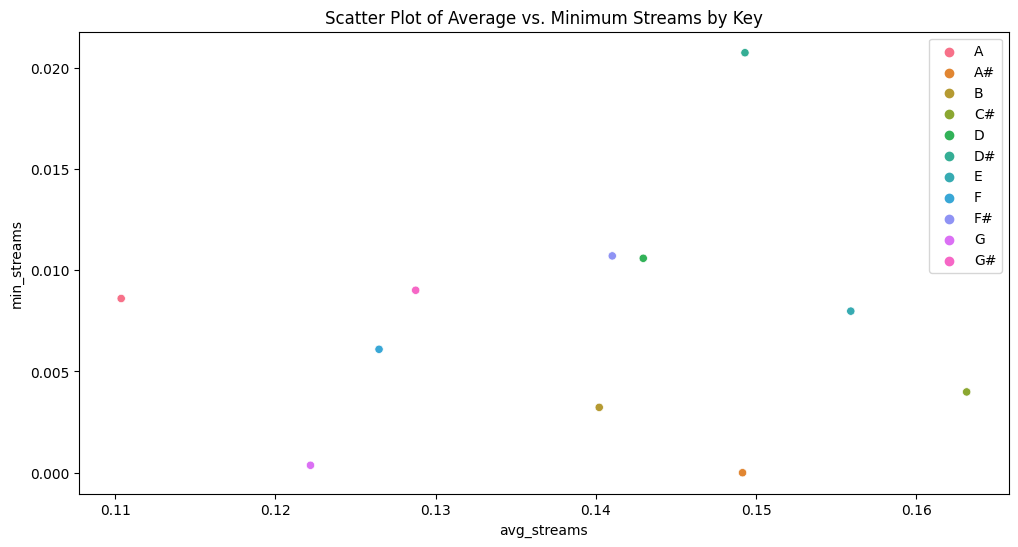

In [84]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="avg_streams",y="min_streams",hue="key",data=result_df)
plt.legend(loc='upper right')
plt.title('Scatter Plot of Average vs. Minimum Streams by Key')
plt.show()

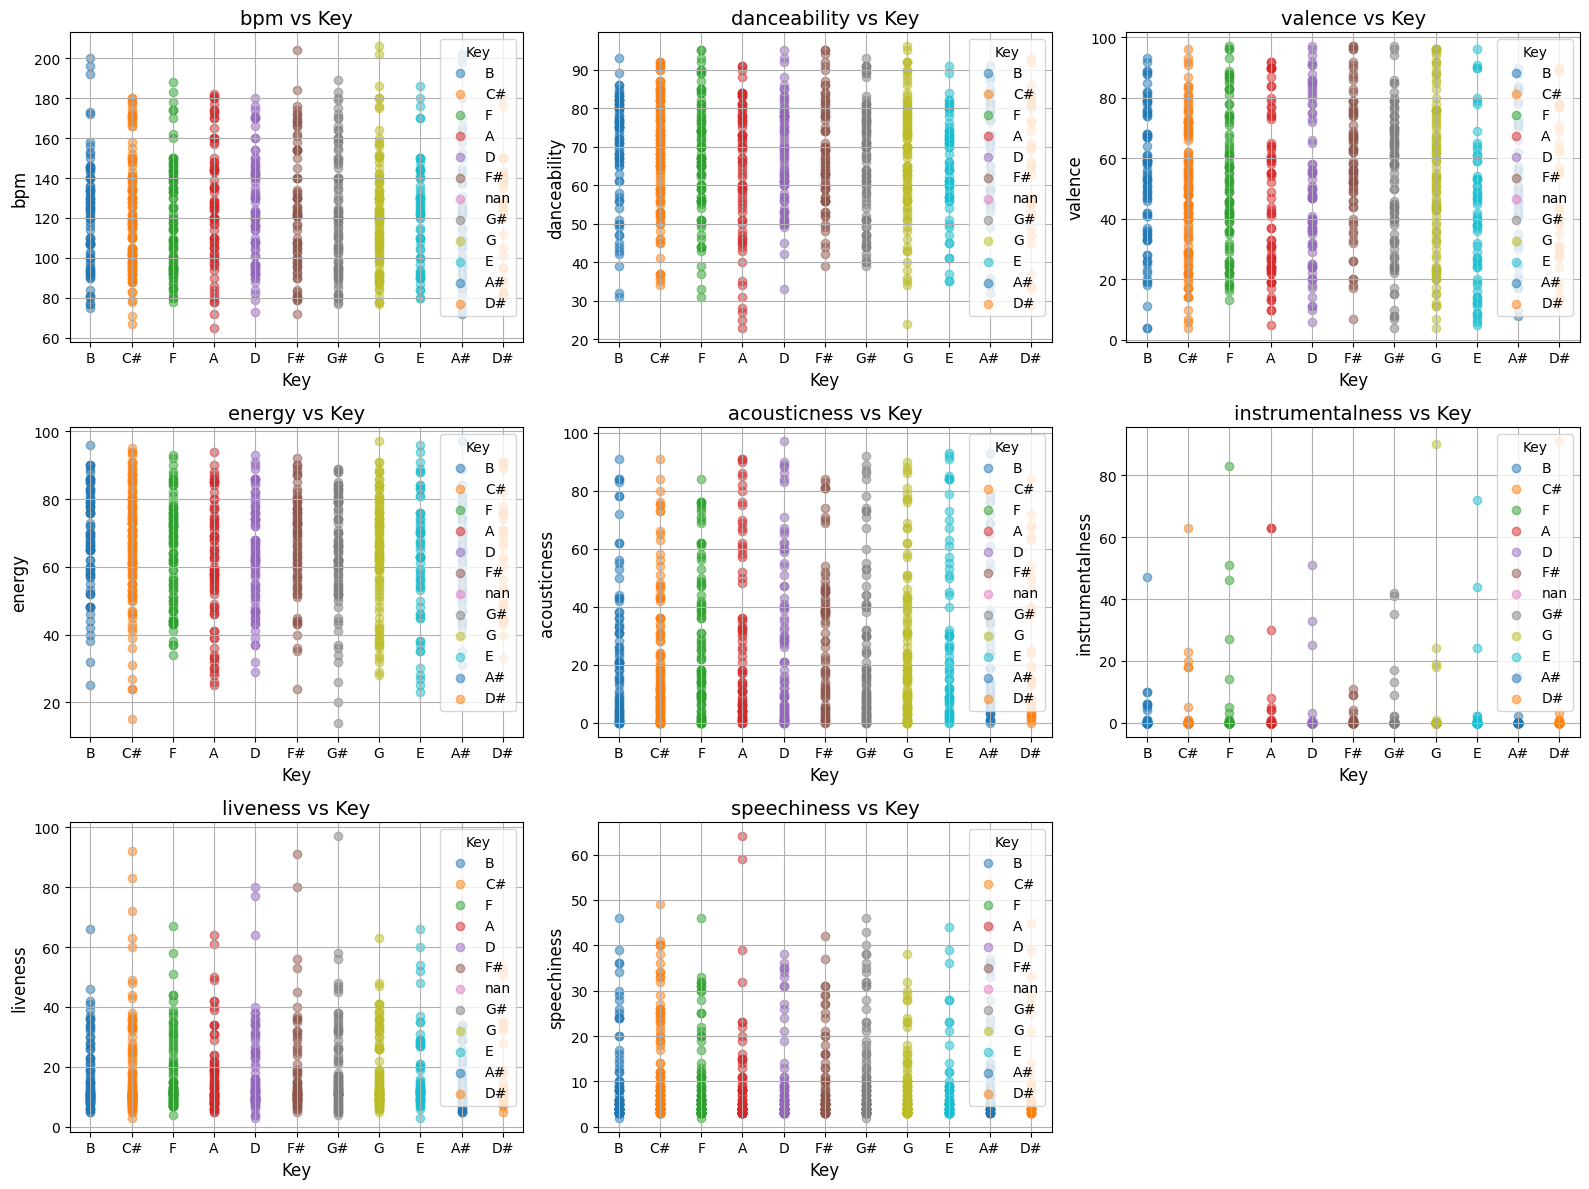

In [95]:
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']
fig,axs = plt.subplots(3,3,figsize=(16,12))
axs = axs.flatten()
for i,column in enumerate(columns_to_plot):
    for key in df_da["key"].unique():
        plt.sca(axs[i])
        plt.scatter(df_da.loc[df_da['key'] == key]['key'],df_da.loc[df_da["key"] == key][column], label=key,alpha=0.5)
        plt.xlabel("Key", fontsize=12)
        plt.ylabel(column, fontsize=12)
        plt.title(f"{column} vs Key", fontsize=14)
        plt.grid(True)
        plt.legend(title="Key", loc="upper right")

for i in range(len(columns_to_plot), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


In [96]:
df_da.columns

Index(['streams', 'bpm', 'danceability', 'valence', 'energy', 'acousticness',
       'instrumentalness', 'liveness', 'speechiness', 'key_a', 'key_a#',
       'key_b', 'key_c#', 'key_d', 'key_d#', 'key_e', 'key_f', 'key_f#',
       'key_g', 'key_g#', 'mode_major', 'mode_minor', 'key'],
      dtype='object')

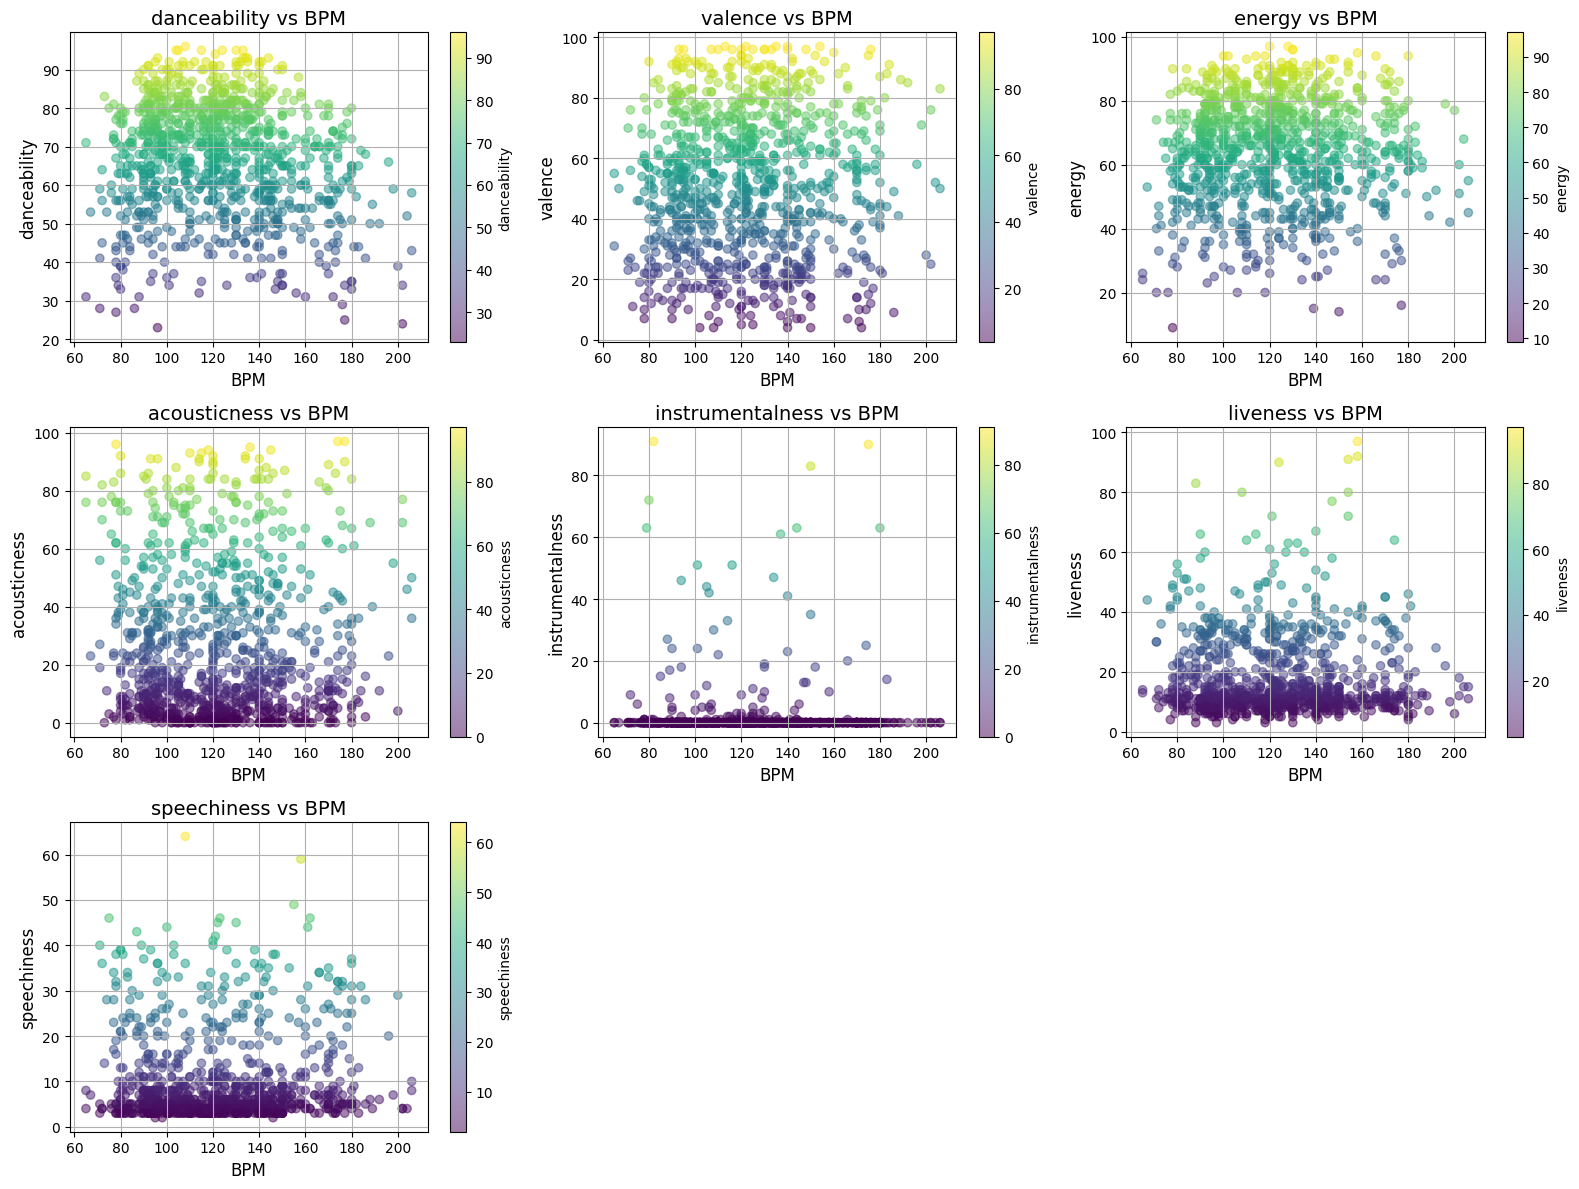

In [103]:
columns_to_plot = ['danceability','valence','energy','acousticness','instrumentalness','liveness','speechiness']
fig,axs = plt.subplots(3,3,figsize=(16,12))
axs = axs.flatten()
for i in range(len(columns_to_plot)):
    plt.sca(axs[i])
    scatter = plt.scatter(x="bpm",y=columns_to_plot[i],data=df_da,c=columns_to_plot[i], cmap="viridis",alpha=0.5)
    plt.xlabel("BPM", fontsize=12)
    plt.ylabel(columns_to_plot[i], fontsize=12)
    plt.title(f"{columns_to_plot[i]} vs BPM", fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label=columns_to_plot[i])

for i in range(len(columns_to_plot), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

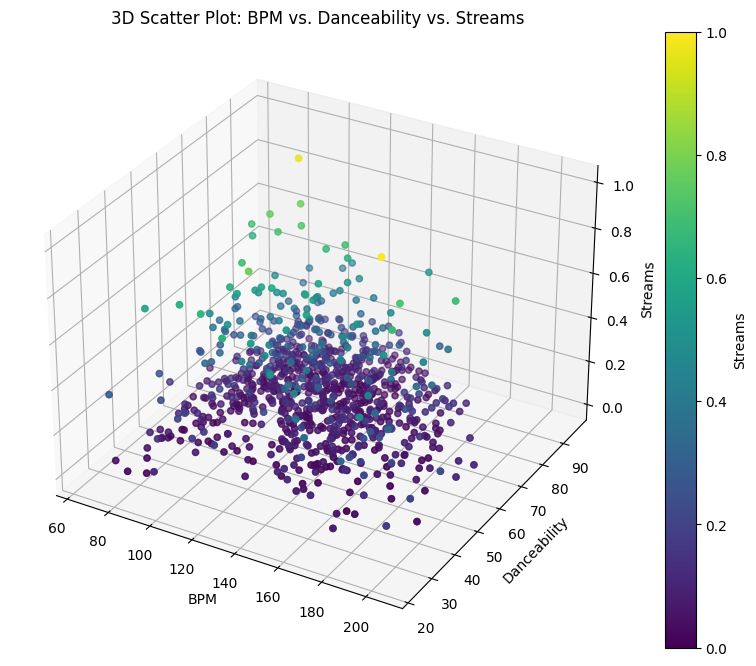

In [110]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_da["bpm"],df_da["danceability"], df_da["streams"], c=df_da["streams"], cmap="viridis", marker='o')
ax.set_xlabel("BPM")
ax.set_ylabel("Danceability")
ax.set_zlabel("Streams")

cbar = fig.colorbar(ax.scatter(df_da["bpm"],df_da["danceability"], df_da["streams"],c=df_da["streams"], cmap="viridis", marker='o'), ax=ax)
cbar.set_label("Streams", rotation=90)
plt.title('3D Scatter Plot: BPM vs. Danceability vs. Streams')


plt.show()


In [134]:
df_da.columns

Index(['streams', 'bpm', 'danceability', 'valence', 'energy', 'acousticness',
       'instrumentalness', 'liveness', 'speechiness', 'key_a', 'key_a#',
       'key_b', 'key_c#', 'key_d', 'key_d#', 'key_e', 'key_f', 'key_f#',
       'key_g', 'key_g#', 'mode_major', 'mode_minor', 'key'],
      dtype='object')

<Axes: >

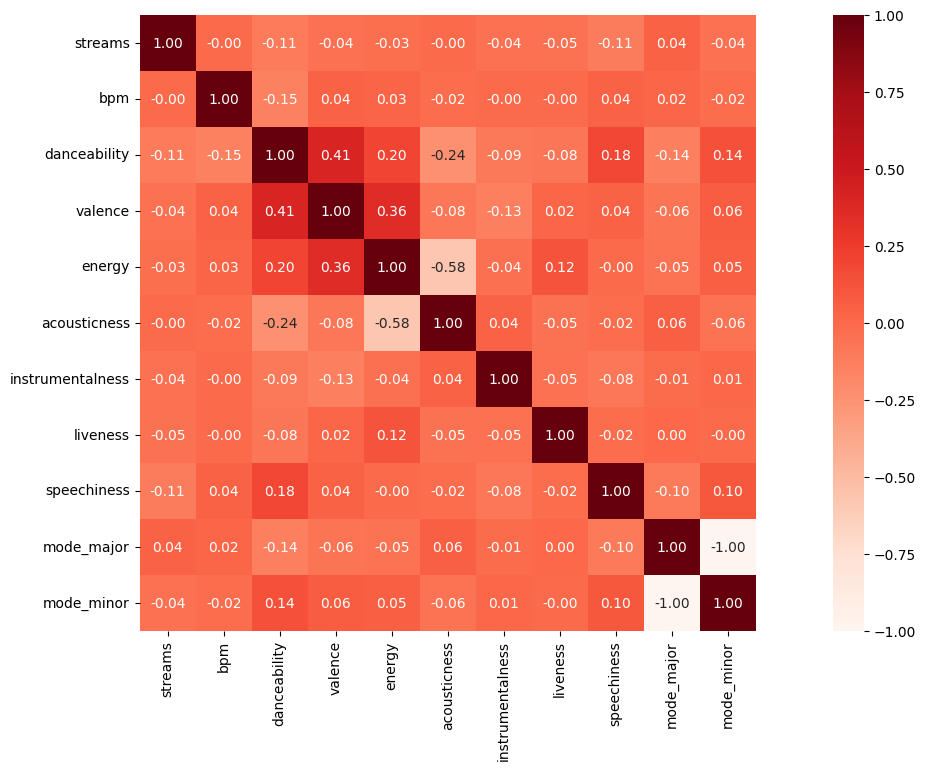

In [144]:

column_to_corr = list(filter(lambda x:"key" not in x, df_da.columns.tolist()))
plt.figure(figsize=(20,8))
sns.heatmap(df_da[column_to_corr].corr(),annot=True,fmt=".2f",cmap="Reds",square=True)

In [112]:
top_10_songs = df_da.nlargest(10, "streams")
top_10_songs.describe()

streams        bpm  danceability    valence     energy  acousticness  \
count  10.000000   10.00000     10.000000  10.000000  10.000000     10.000000   
mean    0.781788  124.50000     69.700000  59.200000  62.300000     32.200000   
std     0.109683   36.84879     12.454807  20.660214  12.858633     30.308781   
min     0.692657   90.00000     50.000000  36.000000  41.000000      0.000000   
25%     0.705167   96.50000     61.250000  45.750000  53.750000      4.000000   
50%     0.745434  107.00000     75.500000  51.500000  61.000000     28.500000   
75%     0.778000  158.75000     77.000000  71.500000  73.250000     57.000000   
max     1.000000  186.00000     83.000000  93.000000  80.000000     75.000000   

       instrumentalness   liveness  speechiness  key_a  ...     key_c#  \
count              10.0  10.000000    10.000000   10.0  ...  10.000000   
mean                0.0  14.700000     8.500000    0.0  ...   0.500000   
std                 0.0   8.882567     7.367345    0.0  ...   0.527046   
min                 0.0   7.000000     3.000000    0.0  ...   0.000000   
25%                 0.0   9.250000     5.000000    0.0  ...   0.000000   
50%                 0.0  11.000000     6.000000    0.0  ...   0.500000   
75%                 0.0  16.750000     9.500000    0.0  ...   1.000000   
max                 0.0  36.000000    28.000000    0.0  ...   1.000000   

           key_d  key_d#  key_e  key_f     key_f#      key_g     key_g#  \
count  10.000000    10.0   10.0   10.0  10.000000  10.000000  10.000000   
mean    0.100000     0.0    0.0    0.0   0.100000   0.100000   0.100000   
std     0.316228     0.0    0.0    0.0   0.316228   0.316228   0.316228   
min     0.000000     0.0    0.0    0.0   0.000000   0.000000   0.000000   
25%     0.000000     0.0    0.0    0.0   0.000000   0.000000   0.000000   
50%     0.000000     0.0    0.0    0.0   0.000000   0.000000   0.000000   
75%     0.000000     0.0    0.0    0.0   0.000000   0.000000   0.000000   
max     1.000000     0.0    0.0    0.0   1.000000   1.000000   1.000000   

       mode_major  mode_minor  
count   10.000000   10.000000  
mean     0.700000    0.300000  
std      0.483046    0.483046  
min      0.000000    0.000000  
25%      0.250000    0.000000  
50%      1.000000    0.000000  
75%      1.000000    0.750000  
max      1.000000    1.000000  

[8 rows x 22 columns]

In [145]:
top_50_songs = df_da.nlargest(50, "streams")
top_50_songs.describe()

streams         bpm  danceability    valence     energy  \
count  50.000000   50.000000     50.000000  50.000000  50.000000   
mean    0.602420  122.120000     61.200000  47.920000  60.740000   
std     0.118900   31.031018     14.735768  23.170918  16.648601   
min     0.468545   71.000000     33.000000   6.000000  26.000000   
25%     0.503623   98.250000     50.500000  30.750000  50.250000   
50%     0.579728  118.500000     61.000000  47.500000  59.500000   
75%     0.676610  145.500000     74.750000  63.000000  73.000000   
max     1.000000  186.000000     91.000000  93.000000  93.000000   

       acousticness  instrumentalness  liveness  speechiness      key_a  ...  \
count     50.000000         50.000000  50.00000    50.000000  50.000000  ...   
mean      30.820000          0.040000  15.66000     8.500000   0.040000  ...   
std       29.384634          0.282843   9.29035     8.529062   0.197949  ...   
min        0.000000          0.000000   5.00000     2.000000   0.000000  ...   
25%        4.000000          0.000000   9.00000     4.000000   0.000000  ...   
50%       25.500000          0.000000  11.00000     5.000000   0.000000  ...   
75%       52.250000          0.000000  21.00000     8.000000   0.000000  ...   
max       93.000000          2.000000  38.00000    44.000000   1.000000  ...   

          key_c#      key_d     key_d#      key_e      key_f     key_f#  \
count  50.000000  50.000000  50.000000  50.000000  50.000000  50.000000   
mean    0.180000   0.100000   0.040000   0.120000   0.020000   0.080000   
std     0.388088   0.303046   0.197949   0.328261   0.141421   0.274048   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

           key_g     key_g#  mode_major  mode_minor  
count  50.000000  50.000000   50.000000   50.000000  
mean    0.040000   0.080000    0.560000    0.440000  
std     0.197949   0.274048    0.501427    0.501427  
min     0.000000   0.000000    0.000000    0.000000  
25%     0.000000   0.000000    0.000000    0.000000  
50%     0.000000   0.000000    1.000000    0.000000  
75%     0.000000   0.000000    1.000000    1.000000  
max     1.000000   1.000000    1.000000    1.000000  

[8 rows x 22 columns]

In [146]:
top_100_songs = df_da.nlargest(100, "streams")
top_100_songs.describe()

streams         bpm  danceability    valence      energy  \
count  100.000000  100.000000    100.000000  100.00000  100.000000   
mean     0.501734  122.600000     62.990000   50.84000   64.670000   
std      0.133796   27.729939     14.956837   23.10482   16.874495   
min      0.345429   71.000000     32.000000    6.00000   26.000000   
25%      0.393335  101.500000     52.000000   37.50000   52.000000   
50%      0.465716  119.000000     62.500000   50.00000   66.000000   
75%      0.578095  141.250000     75.000000   67.00000   78.000000   
max      1.000000  186.000000     95.000000   97.00000   93.000000   

       acousticness  instrumentalness   liveness  speechiness       key_a  \
count    100.000000        100.000000  100.00000   100.000000  100.000000   
mean      26.460000          0.430000   17.35000     7.680000    0.030000   
std       28.351481          2.742317   12.85771     7.646059    0.171447   
min        0.000000          0.000000    3.00000     2.000000    0.000000   
25%        3.000000          0.000000    9.00000     4.000000    0.000000   
50%       13.000000          0.000000   11.00000     5.000000    0.000000   
75%       44.750000          0.000000   24.00000     8.000000    0.000000   
max       97.000000         25.000000   64.00000    44.000000    1.000000   

       ...      key_c#       key_d      key_d#       key_e       key_f  \
count  ...  100.000000  100.000000  100.000000  100.000000  100.000000   
mean   ...    0.170000    0.100000    0.040000    0.070000    0.110000   
std    ...    0.377525    0.301511    0.196946    0.256432    0.314466   
min    ...    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    ...    0.000000    0.000000    0.000000    0.000000    0.000000   
50%    ...    0.000000    0.000000    0.000000    0.000000    0.000000   
75%    ...    0.000000    0.000000    0.000000    0.000000    0.000000   
max    ...    1.000000    1.000000    1.000000    1.000000    1.000000   

          key_f#       key_g     key_g#  mode_major  mode_minor  
count  100.00000  100.000000  100.00000  100.000000  100.000000  
mean     0.08000    0.070000    0.08000    0.640000    0.360000  
std      0.27266    0.256432    0.27266    0.482418    0.482418  
min      0.00000    0.000000    0.00000    0.000000    0.000000  
25%      0.00000    0.000000    0.00000    0.000000    0.000000  
50%      0.00000    0.000000    0.00000    1.000000    0.000000  
75%      0.00000    0.000000    0.00000    1.000000    1.000000  
max      1.00000    1.000000    1.00000    1.000000    1.000000  

[8 rows x 22 columns]

In [147]:
df_da.shape

(953, 23)

In [148]:
top_200_songs = df_da.nlargest(200, 'streams')
top_500_songs = df_da.nlargest(500, 'streams')
top_700_songs = df_da.nlargest(700, 'streams')
top_953_songs = df_da.nlargest(953, 'streams')

last_10_songs = df_da.nsmallest(10, 'streams')
last_50_songs = df_da.nsmallest(50, 'streams')
last_100_songs = df_da.nsmallest(100, 'streams')
last_200_songs = df_da.nsmallest(200, 'streams')
last_500_songs = df_da.nsmallest(500, 'streams')

## Analysis Keys

In [150]:
key_colors = {
    'key_a': 'red',
    'key_a#': 'blue',
    'key_b': 'green',
    'key_c#': 'purple',
    'key_d': 'orange',
    'key_d#': 'cyan',
    'key_e': 'magenta',
    'key_f': 'yellow',
    'key_f#': 'lime',
    'key_g': 'pink',
    'key_g#': 'brown'
}

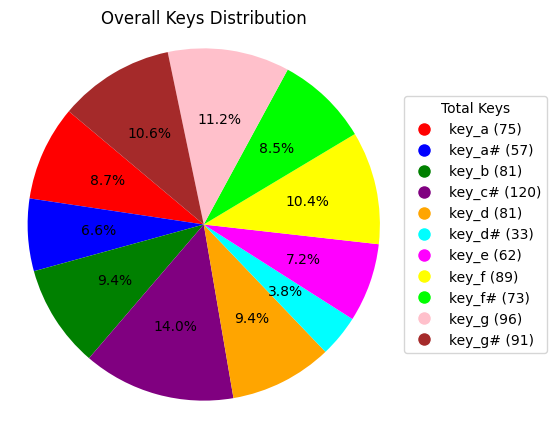

In [173]:
key_df = df_da[key_colors.keys()]
key_counts = key_df.eq(1).sum() # key별로 1인 값의 개수를 구함

plt.figure(figsize=(5,5))
plt.pie(key_counts,labels=None,autopct='%1.1f%%',startangle=140,colors=key_colors.values())
plt.title('Overall Keys Distribution')
plt.axis('equal') 

legend_labels = [key + f" ({key_counts[key]})" for key in key_counts.keys()]
legend_patches = [plt.Line2D([0],[0],marker='o',color="w",label=label,markersize=10,markerfacecolor=key_colors[key]) for label,key in zip(legend_labels,key_counts.index)]
plt.legend(handles=legend_patches, loc="center left",bbox_to_anchor=(1,0.5), title="Total Keys")
plt.show()

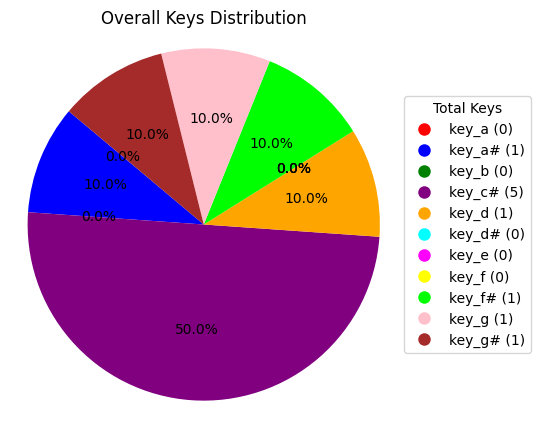

In [174]:
key_df = top_10_songs[key_colors.keys()]
key_counts = key_df.eq(1).sum() # key별로 1인 값의 개수를 구함

plt.figure(figsize=(5,5))
plt.pie(key_counts,labels=None,autopct='%1.1f%%',startangle=140,colors=key_colors.values())
plt.title('Overall Keys Distribution')
plt.axis('equal') 

legend_labels = [key + f" ({key_counts[key]})" for key in key_counts.keys()]
legend_patches = [plt.Line2D([0],[0],marker='o',color="w",label=label,markersize=10,markerfacecolor=key_colors[key]) for label,key in zip(legend_labels,key_counts.index)]
plt.legend(handles=legend_patches, loc="center left",bbox_to_anchor=(1,0.5), title="Total Keys")
plt.show()

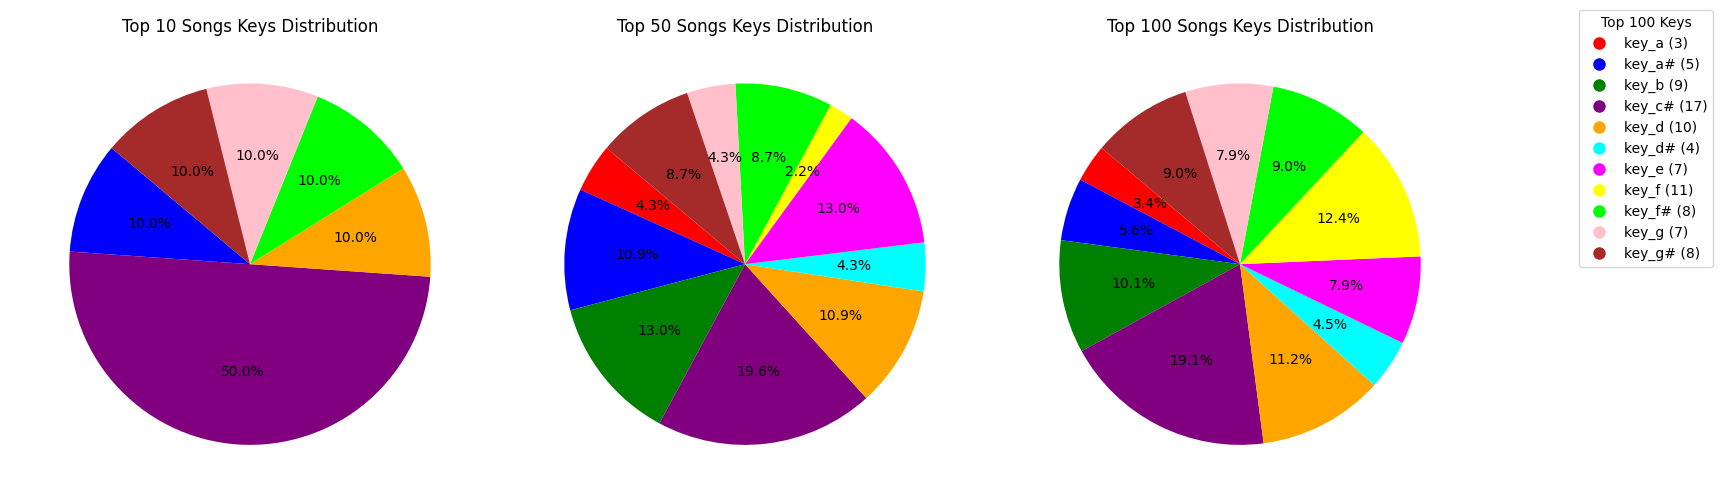

In [176]:
df_to_pie = [top_10_songs,top_50_songs,top_100_songs]
chart_titles = ['Top 10 Songs Keys Distribution', 'Top 50 Songs Keys Distribution', 'Top 100 Songs Keys Distribution']
fig,axes = plt.subplots(1,3,figsize=(15,5))

for i,(df_to_pie_copy,title) in enumerate(zip(df_to_pie,chart_titles)):
    key_df = df_to_pie_copy[key_colors.keys()]
    key_counts = key_df.eq(1).sum()

    key_counts_filtered = key_counts[key_counts > 0]

    ax = axes[i]
    ax.pie(key_counts_filtered, labels=None, autopct='%1.1f%%', startangle=140, colors=[key_colors[key] for key in key_counts_filtered.index])
    ax.set_title(title)
    ax.axis('equal') 

legend_labels = [key + f" ({key_counts_filtered[key]})" for key in key_counts_filtered.index]
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=key_colors[key]) for label, key in zip(legend_labels, key_counts_filtered.index)]
fig.legend(handles=legend_patches, loc='upper right', title='Top 100 Keys', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()